# Notebook 4: Hierarchical and K-means clustering
***

In this notebook we'll practice clustering data using hierarchical clustering and K-means. Conceptually, neither is particularly difficult to get a handle on, so we will spend most of our time thinking about some of the nitty-gritty details, like computing cluster sizes and determining when to diagnose convergence and stop iterating.

We'll need some nice packages for this notebook, so let's load them.

In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

We also will want a helper function to compute the Euclidean distance, so let's define one.

In [2]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

<br>

### Exercise 1:  Picking initial clusters

Suppose we have the following set of data:

In [3]:
np.random.seed(12345)
x1 = stats.multivariate_normal.rvs(mean=[1,1], cov=[[.15,0],[0,.15]], size=5)
x2 = stats.multivariate_normal.rvs(mean=[2,2], cov=[[.15,0],[0,.15]], size=6)
X = np.concatenate([x1, x2])

The first step should always be some form of exploration. So, let's have a look at the data to convince ourselves that there might be some kind of clustered structure.

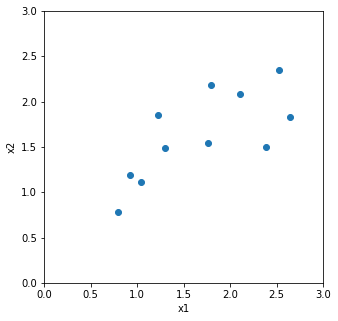

In [4]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.axis([0, 3, 0, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [5]:
X

array([[0.92071706, 1.18549396],
       [0.79882225, 0.78476658],
       [1.76134354, 1.53966376],
       [1.03598307, 1.10911982],
       [1.29784116, 1.4827421 ],
       [2.39008276, 1.49797572],
       [2.1065038 , 2.08865758],
       [2.52398244, 2.34331261],
       [1.2247692 , 1.855986  ],
       [2.64641072, 1.83014267],
       [1.79095904, 2.1847355 ]])

Okay, so maybe there's a cluster centered around (1.1, 1.4) and another one around (2.2, 2) (or something like that?). Whatever the case, if we have any reason to believe there are multiple clusters going on, if you squint hard enough, this figure has some evidence of clustery behavior.

When we start K-means clustering off, we must pick a number of clusters. Obviously, you ran the code above so you know $K=2$ is a great choice, but let's pretend like we didn't know that and we pick $K=3$. Don't even worry though - we'll try $K=2$ as well.

In [6]:
K = 3

We have a few different options for how to start our clustering:
1. Pick $K$ data points at random as the initial cluster centroids
1. Run a cheaper clustering method (or with a subset of the data) to get an estimate of where the clusters might be
1. Pick a point for the first cluster's centroid, then pick a point for the second cluster's centroid that is as far away from the first centroid as possible, and so on up to $K$ centroids.

Often, we will want to perform the clustering multiple times with different initial clusters and different numbers of clusters. So, while we want to do as well as we can with good initial conditions and a reasonable choice for $K$, we also can go back and test different choices.

Anyway, let's do *none* of the above and instead use a poor man's version of Option 2. The $X_1$ coordinate seems to have the most variation (we could compute the variance to see this), so let's pick our 3 initial centroids as the data points with the most extreme high/low $X_1$ values, and the median.

To start, let's get a list of just the $X_1$ coordinates.

In [19]:
x1_coords = X[:,0] # your code goes here!

Now we can get the min, max and median. The min is done for you, and you get to complete the others. Yippee!

In [24]:
centroids = [[0,0], [0,0], [0,0]] # initialize
centroids[0] = X[np.argmin(x1_coords)] # X[list(x1_coords).index(min(x1_coords))]
centroids[1] = X[np.argmax(x1_coords)] # X[list(x1_coords).index(max(x1_coords))]
centroids[2] = X[list(x1_coords).index(np.median(x1_coords))] # your code goes here!

centroids

[array([0.79882225, 0.78476658]),
 array([2.64641072, 1.83014267]),
 array([1.76134354, 1.53966376])]

<br>

### Exercise 2: Assigning to clusters

Now that we have our first estimates of the cluster centroids. Let's loop over our data just once to get a feel for how we can assign each point to a cluster. We can start with just the first data point.

Compute the distances from the first data point, `X[0]`, to each centroid. Store these distances in a list called `dists`. We also want to keep track of our current estimate of which cluster each data point belongs to, so we'll start a list for that too.

In [25]:
dists = [0]*K # your code goes here!
clusters = [-1]*len(X)

Now let's find the index of the nearest centroid, and print out its coordinates for good measure.

In [26]:
assignment = dists.index(min(dists))
print(assignment)
print(centroids[assignment])

0
[0.79882225 0.78476658]


So the 0th cluster (with centroid near (0.80, 0.79)) is the closest to this first data point. Thus, we assign it to cluster 0.

In [27]:
clusters[0] = assignment
clusters

[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

<br>

### Exercise 3:  Hierarchical clustering

Suppose instead we decided we would like to cluster our data using hierarchical clustering. Each data point starts out as its own cluster, and (for example) on the first iteration, we must compare each pair of data points' distances. Then, we pick the minimum pair and pool them into the same cluster. As a convention, we will always use the lower index as the pair's cluster "name".

Let's finish off this incomplete code to make the pairwise comparison of all data points' distances. Places where we need to make changes are marked as TODO. In the end, we want `closest_points` to be a length-2 list of the indices of the two data points in X that are nearest to one another, and `min_dist` should be the Euclidean distance between them.

In [ ]:
min_dist = np.inf # initialize
closest_points = [-1, -1] # initialize
clusters = list(range(len(X))) # initialize each point as its own cluster
centroids = X # initialize each "cluster" centroid as the data point itself
for i in range(len(X)):
    for j in range(i+1, len(X)):
        # compute the distance between X[i] and X[j]
        new_dist = 0 # TODO
        # replace min_dist and closest_points with the new pair's info if it's closer
        if False: # TODO
            min_dist = 0 # TODO
            closest_points = [-1, -1] # TODO

In [ ]:
print(closest_points, min_dist)

At this point, `closest_points` should be [0, 3], so we want to reassign `clusters[3] = 0` (instead of its original value of 3).

In [ ]:
# reassign to the cluster
clusters[max(closest_points)] = min(closest_points)

Now we need to recompute the centroid of cluster 0, or in general, `min(closest_points)`.  There are many ways to do this, including of course the brute force for loop. Here's a slightly more elegant list comprehension to obtain the $X_1$ and $X_2$ coordinates from each data point that is in cluster 0.

In [ ]:
x1_coords = [X[k][0] if clusters[k]==0 else 0 for k in range(len(X))]
x2_coords = [X[k][1] if clusters[k]==0 else 0 for k in range(len(X))]

Now to compute the means in each coordinate, we need the number of data points assigned to this cluster. Obviously, you could just write in "2" and go about your business, but try to come up with a more general computation to get this. Then, use the `x1_coords` and `x2_coords` from above and `n_cluster_0` from below to compute the updated centroid of cluster 0.

In [ ]:
n_cluster_0 = 0 # TODO
centroids[0] = [0, 0] # TODO

At this point, as a matter of bookkeeping, we might want to set the centroid for cluster 3 (which was just "absorbed" into cluster 0) to some fill-value that would alert us if we accidentally used it in a calculation when we should have used the centroid for cluster 0.

In [ ]:
centroids[max(closest_points)] = np.full(shape=centroids[max(closest_points)].shape, fill_value=np.nan)

There you have it! One complete iteration of hierarchical clustering. Now we would again do the distance calculation for each cluster (most of which are still a single data point), and merge the two closest clusters.

<br>

### Bonus!

As you worked through the previous exercises, it may have struck you that it would be convenient to have a `Cluster` object defined, so we can have nice attributes to cleanly keep track of things like which data points are in a given cluster, what the centroid of the cluster is, and so forth. It sure would be convenient to have member functions to update the cluster centroid when a new data point is added to the cluster.

Below is a helpful template. If you're looking for some extra fun for the weekend, have a crack at filling it in! Object-oriented certainly helps keep things tidy - try completing the clustering exercises from above using your shiny new `Cluster` objects.

In [ ]:
class Cluster:
    
    def __init__(self, dim, n=0, X=None):
        '''
        dim = number of dimensions for each data point
        n = number of data points to start with
        X = list of data points (list of lists, or other array-like objects)
        '''
        self.dim = dim
        self.n = n
        self.X = X if n != 1 else [X]
        self.centroid = self.compute_centroid()
        
    def add_data_pt(self, Xnew):
        '''
        Add a data point Xnew to the cluster.
        Depending on how you structure your code, this routine might want to call update_centroid(...)
        '''
        # TODO
        
    def update_centroid(self, Xnew):
        '''
        Use formula for online update of the mean to update each component of the centroid using n and Xnew
            m[n] = m[n-1] + (a[n] - m[n-1])/n
        (https://math.stackexchange.com/questions/106700/incremental-averageing)
        '''
        # TODO
        
    def compute_centroid(self):
        '''
        Compute the centroid the hard way, by taking the mean of all data points in the cluster (self.X)
        '''
        centr = [np.nan]*self.dim
        # TODO

        return centr